<a href="https://colab.research.google.com/github/AGRocky/AG_ML_Project/blob/master/Taiyo_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **Taiyo.AI Assigment Task:**







1.   **For this paticular task I've taken the data from the source** https://pipeline.gihub.org/ .


2.   **Under the country section I've choosen 'India' and sub categorey to that I've taken 'Information project under implementation Industrial Infrastructure Development Corporation (IDCO)'** 

  **Source Link:** https://industries.odisha.gov.in/about-us/associate-bodies/IDCO/about-IDCO


3.   **For the Chatbot Implementation I've Scrapped data from the above source.**




---



---




**Installing packages for scrapping data from web**

In [ ]:
!pip install beautifulsoup4
!pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import requests
from bs4 import BeautifulSoup

## Actual Code for scrapping data

In [ ]:
req = requests.get("https://industries.odisha.gov.in/about-us/associate-bodies/IDCO/about-IDCO")
soup = BeautifulSoup(req.content, "html.parser")

In [ ]:
req1 = requests.get("https://industries.odisha.gov.in/about-us/associate-bodies/IDCO/infrastructure-projects-under-implementation")
soup1 = BeautifulSoup(req1.content, "html.parser")

In [ ]:
req2 = requests.get("https://industries.odisha.gov.in/about-us/associate-bodies/IDCO/construction-work")
soup2 = BeautifulSoup(req2.content, "html.parser")

In [ ]:
req3 = requests.get("https://industries.odisha.gov.in/about-us/associate-bodies/idco/completed-during-year")
soup3 = BeautifulSoup(req3.content, "html.parser")

In [ ]:
req4 = requests.get("https://industries.odisha.gov.in/about-us/associate-bodies/idco/land-acquisition")
soup4 = BeautifulSoup(req4.content, "html.parser")

In [ ]:
req5 = requests.get("https://industries.odisha.gov.in/about-us/associate-bodies/idco/ongoing-work-progress")
soup5 = BeautifulSoup(req5.content, "html.parser")

**This code block collects all the data from different websites and stores in a .txt file as one whole data to feed to the model.**





In [ ]:
with open("output.txt", "w") as f:
  print(soup.get_text(), file = f)
  print(soup1.get_text(), file = f)
  print(soup2.get_text(), file = f)
  print(soup3.get_text(), file = f)
  print(soup4.get_text(), file = f)
  print(soup5.get_text(), file = f)

  f.close()

# Installing all the dependencies and packages of LLMs



In [ ]:
! pip install -q langchain transformers sentence_transformers llama-index
from llama_index import SimpleDirectoryReader, LangchainEmbedding, GPTListIndex,GPTSimpleVectorIndex, PromptHelper
from langchain.embeddings.huggingface import HuggingFaceEmbeddings
from llama_index import LLMPredictor, ServiceContext
import torch
from langchain.llms.base import LLM
from transformers import pipeline


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.4/515.4 kB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 75.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.8/174.8 kB 20.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 51.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 100.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 71.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.3/70.3 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 89.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

**Creating a funtion to call the "FLAN-T5" model.**


In [ ]:
class customLLM(LLM):
    model_name = "google/flan-t5-large"
    pipeline = pipeline("text2text-generation", model=model_name, device=0, model_kwargs={"torch_dtype":torch.bfloat16})

    def _call(self, prompt, stop=None):
        return self.pipeline(prompt, max_length=9999)[0]["generated_text"]
 
    def _identifying_params(self):
        return {"name_of_model": self.model_name}

    def _llm_type(self):
        return "custom"


llm_predictor = LLMPredictor(llm=customLLM())

In [ ]:

hfemb = HuggingFaceEmbeddings()
embed_model = LangchainEmbedding(hfemb)

In [ ]:
text = '/content/output.txt'
file1 = open(text, "r")

In [ ]:
# print(file1.read())
text1 = file1.read()
file1.close()

In [ ]:

from llama_index import Document

text_list = [text1]

documents = [Document(t) for t in text_list]

In [ ]:

# set number of output tokens
num_output = 500
# set maximum input size
max_input_size = 512
# set maximum chunk overlap
max_chunk_overlap = 15


prompt_helper = PromptHelper(max_input_size, num_output, max_chunk_overlap)

In [ ]:

# index = GPTSimpleVectorIndex(documents, embed_model=embed_model, llm_predictor=llm_predictor, prompt_helper=prompt_helper)

# index = GPTListIndex(documents, embed_model=embed_model, llm_predictor=llm_predictor)

service_context = ServiceContext.from_defaults(llm_predictor=llm_predictor, embed_model=embed_model)
index = GPTSimpleVectorIndex.from_documents(documents, service_context=service_context)

In [ ]:

import logging

logging.getLogger().setLevel(logging.CRITICAL)


In [ ]:
response = index.query( "What are Ongoing Work in Progress?") 


Token indices sequence length is longer than the specified maximum sequence length for this model (2290 > 512). Running this sequence through the model will result in indexing errors


In [ ]:
response.response


'Construction of different infrastructure works at CET, Bhubaneswar BPUT Rourkela, VSSUT Burla, IGIT Saranga, Govt College of Engineering Keonjharare in progress. Old age Home at Sambalpur, Kandhamal, Keonjhar Hostel Building (G+6) at Pokhariput is in progress. Working Womens Hostel, Stadium, Swimming poll are in progress. Tech Tower( BidyutBhawan) Shakti Bhawan, Bhubaneswar Kalamandal Project, Bhubaneswar'

In [ ]:

import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

# Using GRADIO for simple UI chatbot interaction.

In [ ]:
!pip install gradio -q


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 57.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.5/140.5 kB 18.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.9/66.9 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.1 MB/s eta 0:00:00


In [ ]:
import gradio as gr


In [ ]:
index = None


In [ ]:

def build_the_bot(input_text):
  text_list = [input_text]
  documents = [Document(t) for t in text_list]
  global index
  service_context = ServiceContext.from_defaults(llm_predictor=llm_predictor, embed_model=embed_model)
  index = GPTSimpleVectorIndex.from_documents(documents, service_context=service_context)
  return('Index saved successfull!!!')

In [ ]:

def chat(chat_history, user_input):
  
  bot_response = index.query(user_input)
  #print(bot_response)
  response = ""
  for letter in ''.join(bot_response.response): #[bot_response[i:i+1] for i in range(0, len(bot_response), 1)]:
      response += letter + ""
      yield chat_history + [(user_input, response)]

In [ ]:

with gr.Blocks() as demo:
    gr.Markdown('# Q&A Bot')
    with gr.Tab("Input The Text Document"):
        text_input = gr.Textbox('Copy Paste The Data Of Output.txt File')
        text_output = gr.Textbox()
        text_button = gr.Button("Build the Bot!!!")
        text_button.click(build_the_bot, text_input, text_output)
    with gr.Tab("Ask the BOT!"):
#          inputbox = gr.Textbox("Input your text to build a Q&A Bot here.....")
          chatbot = gr.Chatbot()
          message = gr.Textbox ("What is this document about?")
          message.submit(chat, [chatbot, message], chatbot)

demo.queue().launch(debug = True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://fe5a47981253b85eaf.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


/usr/local/lib/python3.9/dist-packages/transformers/pipelines/base.py:1070: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://fe5a47981253b85eaf.gradio.live


# Once after running the code the URL will be generated you can click on the url and ask the bot for Q&A.

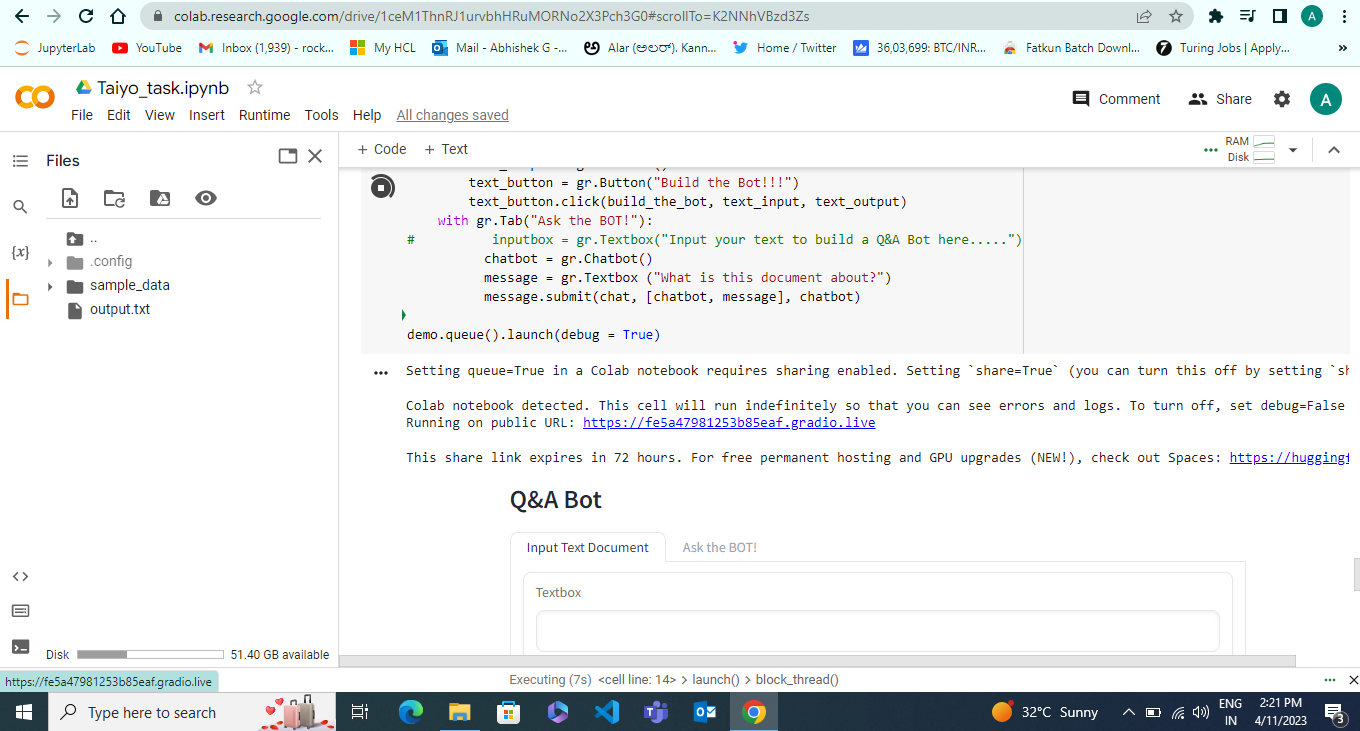

# When the chatbot interface is open before clicking on the 'Build The Bot' button make sure the output.txt data is copy pasted in the Textbox section.

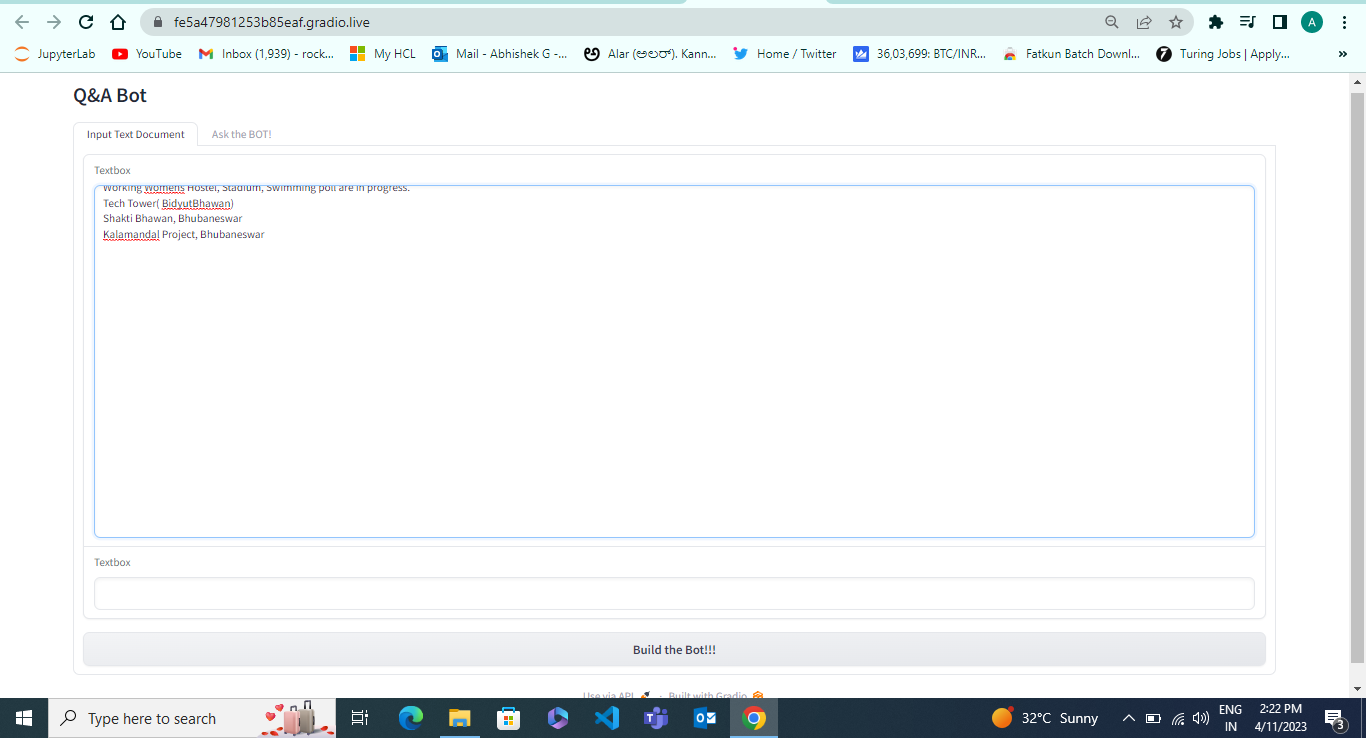

# Click on the next tab 'Ask The Bot' for interacting with the chatbot.

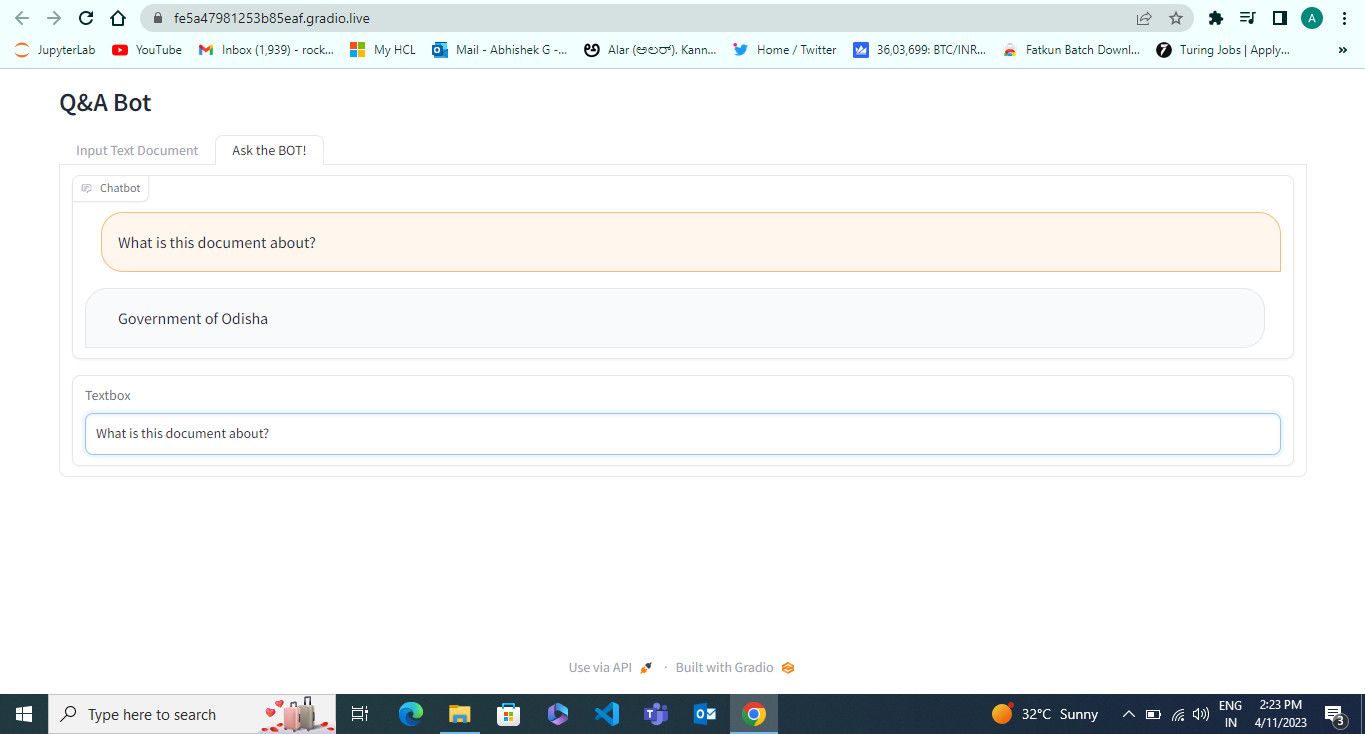

# Below are the series of screenshot of chatbot responding to questions that are asked.

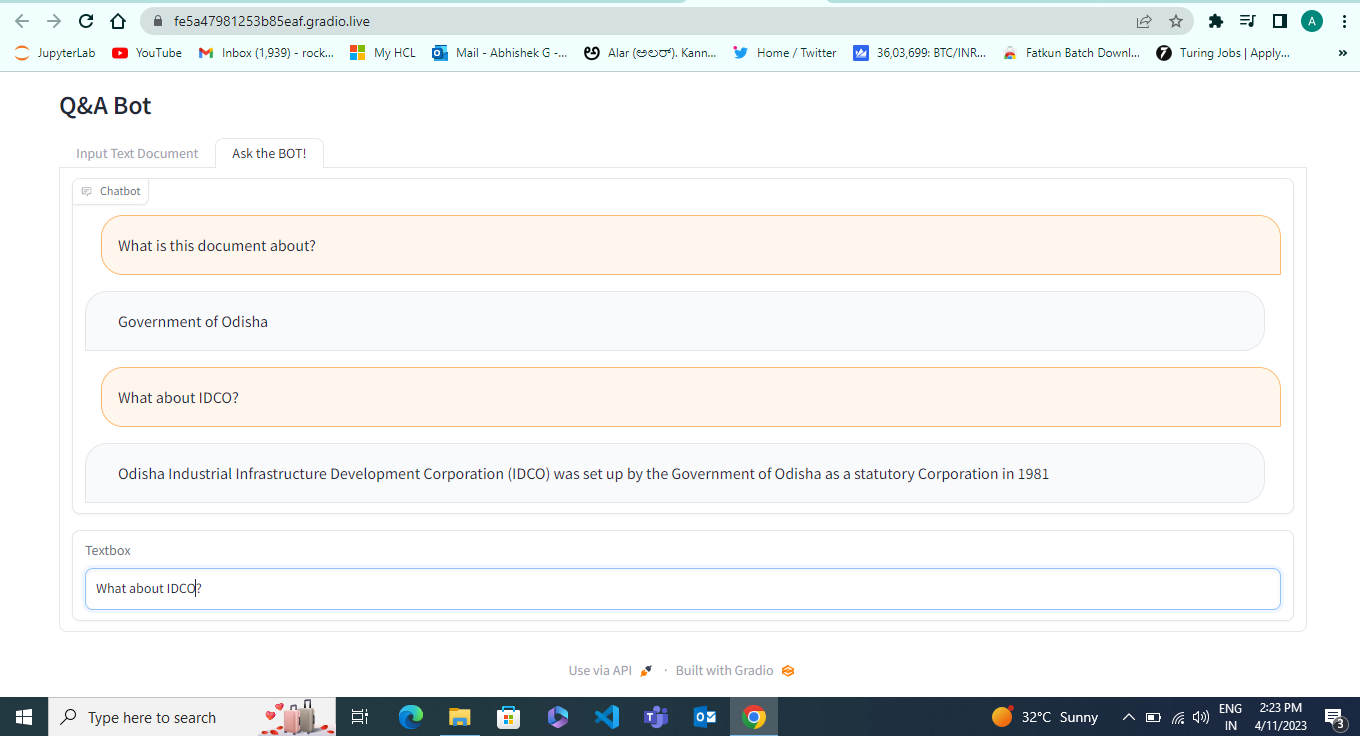

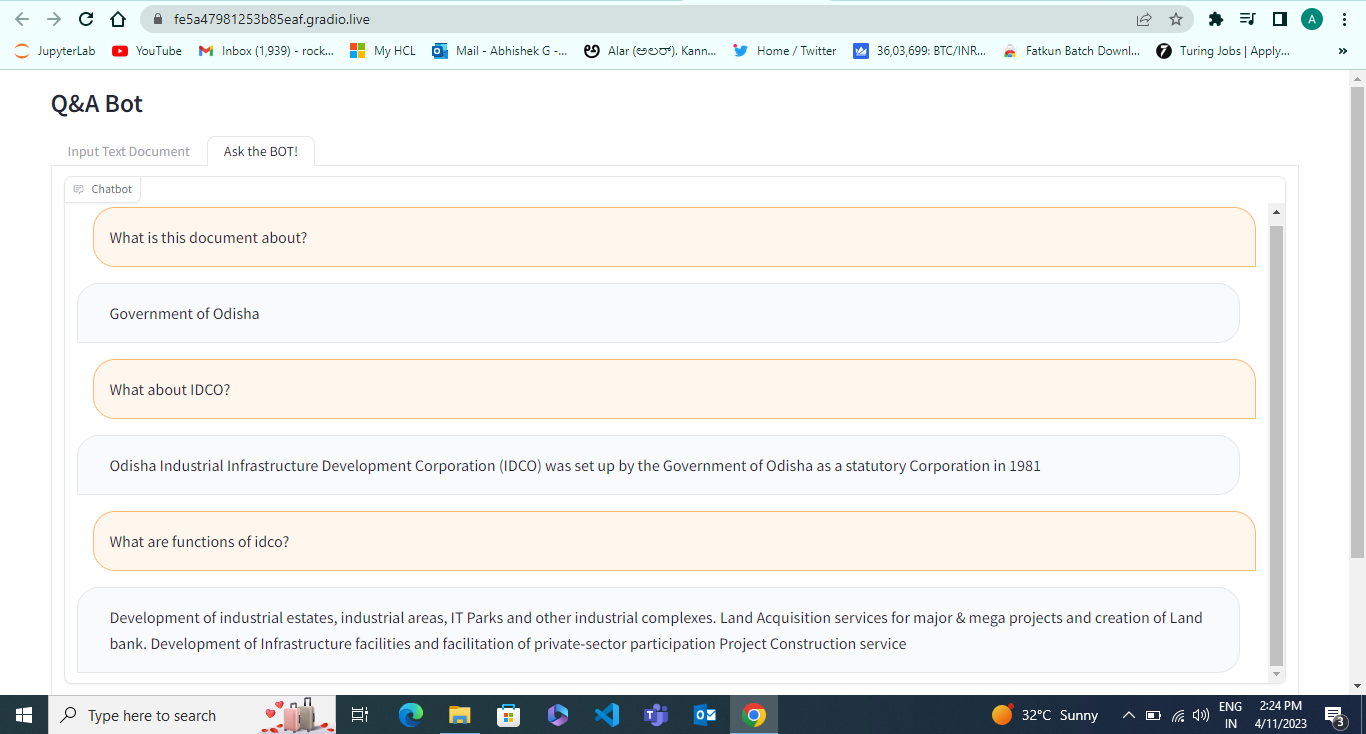

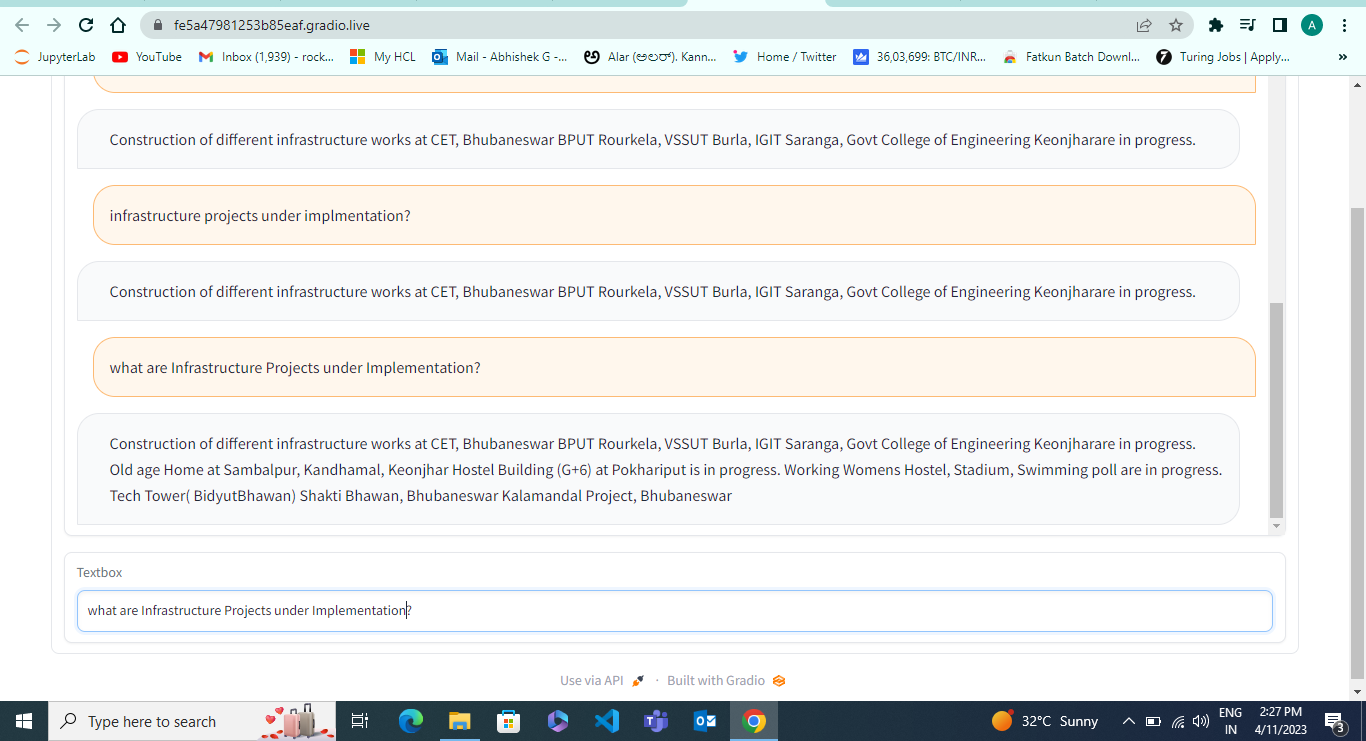

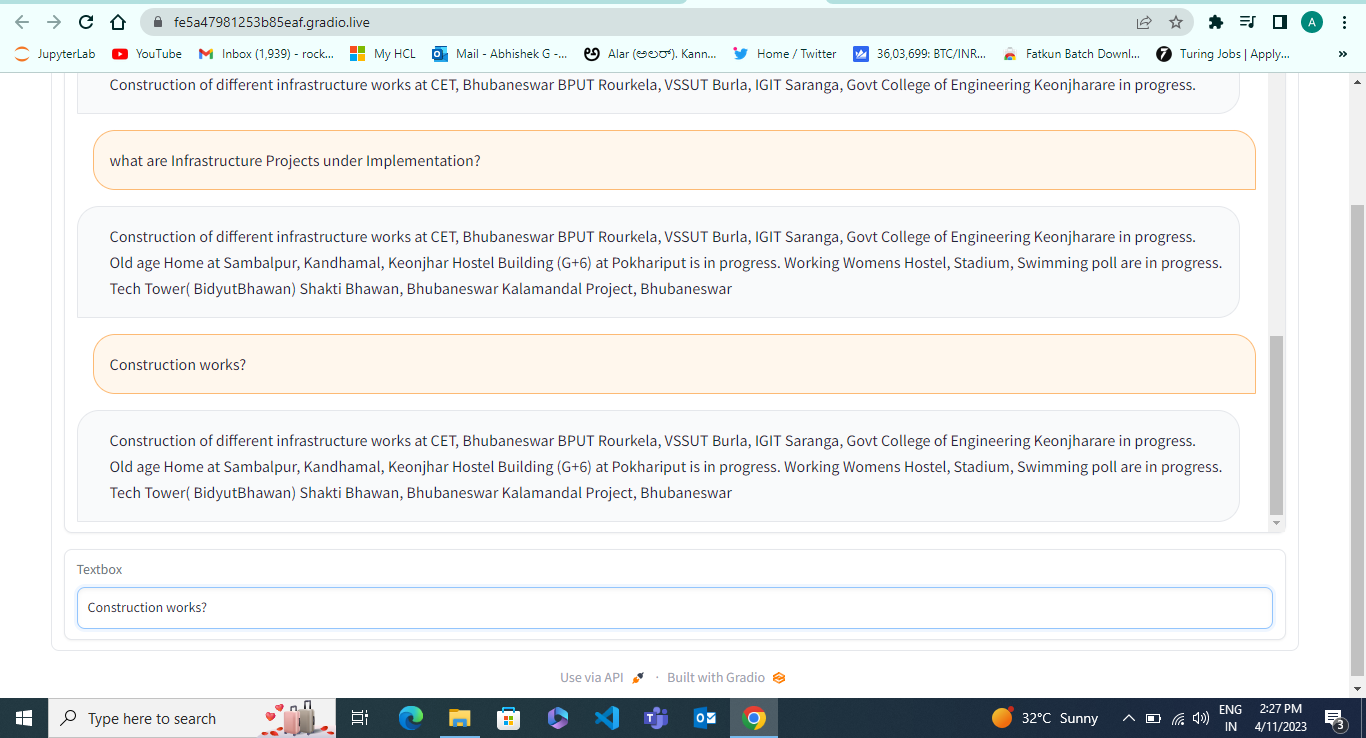